## EJECUTA ESTA CELDA PARA AUTENTICARTE CON TU CUENTA DE GMAIL

In [ ]:
!sudo /opt/miniconda/bin/pip install httplib2 apiclient oauth2client==1.5.2 ntplib tzlocal gspread google-api-python-client==1.6.2

In [1]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

CLICK ON THIS LINK TO AUTHENTICATE WITH YOUR GMAIL ACCOUNT
https://accounts.google.com/o/oauth2/auth?scope=profile+email&redirect_uri=http%3A%2F%2Flocalhost%3A8080&response_type=code&client_id=486275613361-7nk9ktukfcfjevfoe3tamjp0pmbjmprs.apps.googleusercontent.com&access_type=offline
waiting for authentication ...
authentication succeeded


,johanyepes@gmail.comJohan Sebastian Yepes Riosgoogle id: 115131859555741875188authorization code: 4/VQCqldnEY1IGJDEspKyvwzAeyrwvE2zF9EmgGc2bZqQaROCJPV2vcDLZF97NRb1fHlEvQ5OL02OrbcjollhGJpU


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

# Ejercicio 1. Normalización del coste y gradiente

Este ejercicio tiene 3 partes:

(1) Implementa en `NORM_cost` una función de coste que implemente la siguiente definición:

$$ J(\theta) = \frac{1}{m} \sum_{i=0}^m (\theta\mathbf{x}^{(i)} - y^{(i)})^2$$

y que acepte tres parámetros:

- La matriz $\mathbf{X} \in \mathbb{R}^{m\times n}$ (con la primera columna de 1's ya añadida)
- El vector $\mathbf{y} \in \mathbb{R}^m$
- Los parámetros $\theta \in \mathbb{R}^n$ de una línea de regresión.

(2) Implementa la función de gradiente correspondiente en `NORM_grad`

(3) Implementa la función `LR_minimize` de forma que, internamente, llame a `sklearn.optimize.minimize`  con el método `BFGS` usando tanto la función de coste y de gradientes y que se llame con las dos funciones anteriores como argumentos, según se ilustra en el código de comprobación posterior. El valor de inicio del optimizador ha de ser el vector 0.

El valor de $\theta$ en el punto óptimo devuelto por el minimizador que empiece en el vector 0 ha de ser [24794.87, 2936.83] aprox., la función `NORM_cost` evaluada en ese punto 871737913 aprox. y el vector gradiente prácticamente 0.

In [3]:
def NORM_cost(Xc, yc, t):
    return np.mean((Xc.dot(t)-yc)**2)

def NORM_grad(Xc, yc, t):
    return 2*Xc.T.dot(Xc.dot(t)-yc)/len(Xc)

def LR_minimize(cost_function, grad_function):
    
    from scipy.optimize import minimize
    import numpy as np
    import pandas as pd
    
    d = pd.read_csv("data/houses.csv")
    X = np.c_[np.ones(len(d)), d.area.values]
    y = d.value.values 

    x_init = np.zeros(X.shape[1])
    #rm = minimize(cost_function, x_init, jac=grad_function, args=(X,y), method="BFGS")
    rm = minimize(lambda t: cost_function(X, y, t) , x_init, 
                  jac=lambda t: grad_function(X, y, t), method="BFGS")
    
    return rm

import urllib, inspect
src1 = urllib.quote_plus(inspect.getsource(NORM_cost)+"\n"+
                         inspect.getsource(NORM_grad)+"\n"+
                         inspect.getsource(LR_minimize))

comprueba tu código

In [4]:
rm = LR_minimize(NORM_cost, NORM_grad)
print rm

      fun: 871737913.4697466
 hess_inv: array([[ 6.23113283e+00, -5.64148414e-02],
       [-5.64148414e-02,  5.55323776e-04]])
      jac: array([-9.89530236e-12, -9.22009349e-10])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([24794.85968752,  2936.83230103])


#### evaluate your answer before submitting:

In [5]:
!./run CHECK_SOLUTION PS2_1 $src1

<stdin>:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
<stdin>:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [24]:
!./run SUBMIT_SOLUTION PS2_1 $src1

connecting ... registering submission for johanyepes@gmail.com ...
<stdin>:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
<stdin>:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
your submissions sheet is https://docs.google.com/spreadsheets/d/1DLd93QfjZBJi20J-SE6-NSKtNaGtvKEawyPD03luawA
----
evaluation result CORRECT , submission registered


# Ejercicio 2. Normalización de datos 

Completa la siguiente función para que, dada una matriz $\in \mathbb{R}^{m\times n}$, cada dato $x_j^{(i)}$ está normalizado de la siguiente manera:

$$\hat{x}_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j} $$

donde $\mu_j$ y $\sigma_j$ es la media y desviación estándar de los elementos de la columna $j$. Esto produce un dataset cuyas columnas tienen 0 de promedio y 1 de desviación estándar.

Usa para este ejercicio [`sklearn.preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) que ya tiene impementada esta transformación. La función debe de devolver dos resultados:

- `Xr` $\in \mathbb{R}^{m\times n}$ la matrix transformada
- `sc` el objeto `StandardScaler` usado para realizar la transformación. 

Una vez realizada la transformación, los parámetros `mean_` y `scale_` del objeto `sc` deben de coincidir con las medias y stds de cada columna de la matriz original.

In [4]:
def normalize_data(X):
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    Xr = sc.fit_transform(X)
    return Xr,sc

import urllib, inspect
src2 = urllib.quote_plus(inspect.getsource(normalize_data))

Comprueba tu código

In [5]:
from sklearn.preprocessing import StandardScaler
d = pd.read_csv("data/houses.csv")
X = d.values
Xr,sc = normalize_data(X)

print "Transformed column means", np.mean(Xr, axis=0)
print "Transformed column stds", np.std(Xr, axis=0)
print "Standard Scaler object means", sc.mean_
print "Original data means         ", np.mean(X, axis=0)
print "Standard Scaler object stds ", sc.scale_
print "Original data stds          ", np.std(X, axis=0)


Transformed column means [ 8.85402862e-16 -1.18238752e-16]
Transformed column stds [1. 1.]
Standard Scaler object means [1.0158910e+02 3.2314501e+05]
Original data means          [1.0158910e+02 3.2314501e+05]
Standard Scaler object stds  [3.00062559e+01 9.29379430e+04]
Original data stds           [3.00062559e+01 9.29379430e+04]


#### evaluate your answer before submitting:

In [25]:
!./run CHECK_SOLUTION PS2_2 $src2

<stdin>:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [26]:
!./run SUBMIT_SOLUTION PS2_2 $src2

connecting ... registering submission for johanyepes@gmail.com ...
<stdin>:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
your submissions sheet is https://docs.google.com/spreadsheets/d/1DLd93QfjZBJi20J-SE6-NSKtNaGtvKEawyPD03luawA
----
evaluation result CORRECT , submission registered


# Ejercicio 3. Gradiente descendiente
Completa la función siguiente para implementar el Gradiente descendiente para regresión lineal usando el coste y los datos normalizados. Tendrás que:

- Normalizar la matriz X donde se especificia, como hiciste con el ejercicio 2
- Calcular el gradiente normalizado, como hiciste en el ejercicio 1
- Calcular el vector `delta` multiplicando el gradiente normalizado por el `step_size`
- Restarle el vector `delta` al valor actual de los parámetros (variable `theta`)
- Devolver el `theta` final y el objeto `StandardScaler` usando en la normalización de los datos

Fíjate que:

- el valor inicial de `theta` es el vector de ceros.
- si normalizáramos el gradiente estaría descomponesado y no convergería.

_observación_: **NO** llames a funciones de ejercicios anteriores para crear la lista de símbolos, simplemente copia el código a esta.

In [6]:
def grad_descent(step_size=0.1, max_steps=100, min_delta=1e-3):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler

    d = pd.read_csv("data/houses.csv")
    X = d.area.values
    y = d.value.values.astype(float)
    
    # ESTUDIANTE: NORMALIZA X y ANADELE UNA PRIMERA COLUMNA DE 1's
    sc = StandardScaler()
    # Debemos hacer el reshape(), porque ".values" me devuelve un vector de 1D (sin columnas)
    # El StandardScaler opera sobre columnas por lo tanto se debe convertir X a una matriz de (n, 1)
    # donde n es la cantidad de filas de X. El (-1, 1) significa que distribuya los datos a una columna
    # y distribuya las filas necesarias.
    X = sc.fit_transform(X.reshape(-1, 1))
    X = np.c_[np.ones_like(X), X]

    theta = np.zeros(X.shape[1])
    for i in range(max_steps):
        gradient = 2*X.T.dot(X.dot(theta)-y)/len(X)
        delta    = step_size * gradient
        
        if np.linalg.norm(delta)<min_delta:
            break
            
        theta -= delta
    return theta, sc
    
import urllib, inspect
src3 = urllib.quote_plus(inspect.getsource(grad_descent))

Comprubea tu código. Theta  debe de dar [ 323145,   88123] aprox. y la media y std del scaler deben de ser 101, 30 respectivamente aprox.

In [7]:
rg,sc = grad_descent (step_size=.00005)
print "Theta ", rg
print "Scaler", sc.mean_, sc.scale_

Theta  [3215.50654808  876.88552576]
Scaler [101.5891] [30.00625592]


#### evaluate your answer before submitting:

In [8]:
!./run CHECK_SOLUTION PS2_3 $src3

evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [28]:
!./run SUBMIT_SOLUTION PS2_3 $src3

connecting ... registering submission for johanyepes@gmail.com ...
your submissions sheet is https://docs.google.com/spreadsheets/d/1DLd93QfjZBJi20J-SE6-NSKtNaGtvKEawyPD03luawA
----
evaluation result CORRECT , submission registered


# Ejercicio 4. Predicción

Para un dataset $X \in \mathbb{R}^{m \times n}$, asume que el '1' NO está añadido al principio de cada fila de $X$ (tienes que añadirle una primera columna de m 1's).

Dado un $x^{(i)}\in \mathbb{R}^n$ (es decir, una fila de $X$) y un $\theta$ previamente calculado, la predicción para ese elemento es $\theta \cdot x^{(i)}$ y además $\in \mathbb{R}$ (la predicción es un escalar)

Para la entrada $X \in \mathbb{R}^{m \times n}$, la función ha de devolver un vector de predicciones $\in \mathbb{R}^m$


In [9]:
def predict(X, theta, sc=None):    
    Xs = sc.fit_transform(X) if sc is not None else X
        
    Xs = np.c_[np.ones_like(X), Xs]
    prediction = Xs.dot(theta)
    return prediction

import urllib, inspect
src4 = urllib.quote_plus(inspect.getsource(predict))

### Norm Equation:

$\theta = \left ( X^{T}X \right )^{-1}X^{T}y$

In [10]:
from numpy.linalg import inv

def NORM_equation(X, y):
    return np.matmul(np.matmul(inv(np.matmul(X.T, X)), X.T), y)

def NORM_equation2(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

comprueba tu código. ambas rectas, obtenidas con scipy.optimize y con tu implementación del gradiente descendiente deben de coincidir.

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


gradient descent theta (using normalization) [323145.01        88123.34161163]
scipy minimize theta (no normalization)      [24794.85968752  2936.83230103]


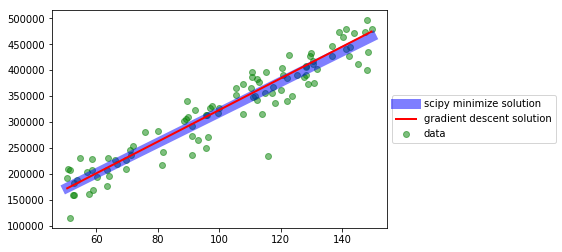

In [11]:
d = pd.read_csv("data/houses.csv")
area = d.area.values

rm = LR_minimize(NORM_cost, NORM_grad)
rg,sc = grad_descent (step_size=.5)

X = np.hstack((np.ones((len(d),1)), d[["area"]].as_matrix()))
y = d.value.as_matrix().astype(float)

#norm = NORM_equation2(X, y)
#print "norm equation theta (no normalization)      ", norm

xg = np.linspace(np.min(X[:,1]), np.max(X[:,1]),100).reshape(-1,1)
plt.scatter(X[:,1], y, color="green", alpha=0.5, label="data")
plt.plot(xg, predict(xg,rm.x), lw=10, alpha=0.5, color="blue", label="scipy minimize solution")
plt.plot(xg, predict(xg,rg, sc), lw=2, alpha=1., color="red", label="gradient descent solution")
#plt.plot(xg, predict(xg,norm), lw=2, alpha=1., color="orange", label="norm equation solution")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print "gradient descent theta (using normalization)", rg
print "scipy minimize theta (no normalization)     ", rm.x

#### evaluate your answer before submitting:

In [12]:
!./run CHECK_SOLUTION PS2_4 $src4

<stdin>:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [13]:
!./run SUBMIT_SOLUTION PS2_4 $src4

connecting ... registering submission for johanyepes@gmail.com ...
<stdin>:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
your submissions sheet is https://docs.google.com/spreadsheets/d/1DLd93QfjZBJi20J-SE6-NSKtNaGtvKEawyPD03luawA
----
evaluation result CORRECT , submission registered


# Ejercicio 5: `sklearn` LinearRegression

Usa [`sklearn.linear_model.LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para crear un modelo de regresión lineal según está implementado en `sklearn`. Puedes ver cómo se usa en [este ejemplo](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).

_observación_: Usa el parámetro `fit_intercept=True`. **NO** llames a funciones de ejercicios anteriores para crear la lista de símbolos, simplemente copia el código a esta.

In [14]:
def sklearnLR():
    
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    d = pd.read_csv("data/houses.csv")

    X = d[["area"]].as_matrix()
    y = d.value.as_matrix().astype(float)


    lr = LinearRegression()
    sc = StandardScaler()
    Xs = sc.fit_transform(X.reshape(-1, 1))
    
    lr.fit(Xs.reshape(-1, 1), y)

    return lr, sc
    
import urllib, inspect
src5 = urllib.quote_plus(inspect.getsource(sklearnLR))

Comprueba tu código. El coeficiente e intercept calculados por sklearn tienen que ser muy parecidos a los que calculaste con tu gradiente descendiente en los ejercicios anteriores.

In [15]:
lr, sc = sklearnLR()
print lr.intercept_, lr.coef_

323145.00999999995 [88123.34161163]


/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


#### evaluate your answer before submitting:

In [16]:
!./run CHECK_SOLUTION PS2_5 $src5

<stdin>:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
<stdin>:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [17]:
!./run SUBMIT_SOLUTION PS2_5 $src5

connecting ... registering submission for johanyepes@gmail.com ...
<stdin>:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
<stdin>:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
your submissions sheet is https://docs.google.com/spreadsheets/d/1DLd93QfjZBJi20J-SE6-NSKtNaGtvKEawyPD03luawA
----
evaluation result CORRECT , submission registered
